****Uni Solar****

import

In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

*Pre-Processing*

combine Solar_Energy_Generation + Solar_Site_Details

In [2]:
### File Import Logic ###

# filenames to load
fname1 = 'Solar_Energy_Generation.csv'
fname2 = 'Solar_Site_Details.csv'
fname3 = 'Weather_Data_reordered_all.csv'
fname4 = 'Monthly_Summary_Solar.csv'

# show current working directory for debugging
cwd = Path().resolve()
print("Current working directory:", cwd)

# search for the files in cwd and subdirectories
def find_file(fname, start=cwd):
	matches = list(start.rglob(fname))
	return matches[0] if matches else None

path1 = find_file(fname1)
path2 = find_file(fname2)
path3 = find_file(fname3)
path4 = find_file(fname4)

if path1 is None or path2 is None:
	missing = [n for n, p in [(fname1, path1), (fname2, path2), (fname3, path3), (fname4, path4)] if p is None]
	raise FileNotFoundError(
		f"Could not find file(s): {missing}. "
		"Place them in the notebook directory (shown above) or a subfolder, or provide the correct path."
	)

solar_generation = pd.read_csv(path1)
solar_site = pd.read_csv(path2)
weather_data = pd.read_csv(path3)
monthly_summary = pd.read_csv(path4)

print("Loaded files:", path1, path2, path3, path4)

Current working directory: C:\Users\ASUS\Documents\Semester5\MachineLearning\ALP_Unisolar_Predict
Loaded files: C:\Users\ASUS\Documents\Semester5\MachineLearning\ALP_Unisolar_Predict\unisolar\Solar_Energy_Generation.csv C:\Users\ASUS\Documents\Semester5\MachineLearning\ALP_Unisolar_Predict\unisolar\Solar_Site_Details.csv C:\Users\ASUS\Documents\Semester5\MachineLearning\ALP_Unisolar_Predict\unisolar\Weather_Data_reordered_all.csv C:\Users\ASUS\Documents\Semester5\MachineLearning\ALP_Unisolar_Predict\unisolar\Monthly_Summary_Solar.csv


In [3]:
#load solar generation data
solar_generation.head(30)

#campusKey, siteKey, timestamp, solargeneration

,CampusKey,SiteKey,Timestamp,SolarGeneration
0,2,1,2020-01-01 00:15:00,NaN
1,2,1,2020-01-01 00:30:00,NaN
2,2,1,2020-01-01 00:45:00,NaN
3,2,1,2020-01-01 01:00:00,NaN
4,2,1,2020-01-01 01:15:00,NaN
5,2,1,2020-01-01 01:30:00,NaN
6,2,1,2020-01-01 01:45:00,NaN
7,2,1,2020-01-01 02:00:00,NaN
8,2,1,2020-01-01 02:15:00,NaN
9,2,1,2020-01-01 02:30:00,NaN


In [4]:
#load site details data
solar_site.head(30)

#campusKey, siteKey, kwp, nuberOfPanels, panel, 
#inverter, optimizers, metric, latitude, longitude

,CampusKey,SiteKey,kWp,Number of panels,Panel,Inverter,Optimizers,Metric,lat,Lon
0,2,1,NaN,NaN,NaN,NaN,NaN,NaN,-36.111209,146.848679
1,2,2,NaN,NaN,NaN,NaN,NaN,NaN,-36.111209,146.848679
2,2,3,NaN,NaN,NaN,NaN,NaN,NaN,-36.111209,146.848679
3,2,4,NaN,NaN,NaN,NaN,NaN,NaN,-36.111209,146.848679
4,2,5,NaN,NaN,NaN,NaN,NaN,NaN,-36.111209,146.848679
5,3,6,NaN,NaN,NaN,NaN,NaN,NaN,-36.778858,144.301232
6,3,7,NaN,NaN,NaN,NaN,NaN,NaN,-36.778858,144.301232
7,3,8,NaN,NaN,NaN,NaN,NaN,NaN,-36.778858,144.301232
8,3,9,NaN,NaN,NaN,NaN,NaN,NaN,-36.778858,144.301232
9,3,10,NaN,NaN,NaN,NaN,NaN,NaN,-36.778858,144.301232


In [5]:
#load weather data
weather_data.head(30)

,CampusKey,Timestamp,ApparentTemperature,AirTemperature,DewPointTemperature,RelativeHumidity,WindSpeed,WindDirection
0,1,2020-01-01 00:00:00,13.666667,13.880000,8.960000,72.400000,0.000000,188.133333
1,1,2020-01-01 00:15:00,13.206667,13.666667,9.040000,73.466667,1.200000,203.866667
2,1,2020-01-01 00:30:00,12.840000,13.553333,9.053333,74.000000,2.520000,222.800000
3,1,2020-01-01 00:45:00,12.113333,13.506667,9.100000,74.466667,5.986667,231.133333
4,1,2020-01-01 01:00:00,11.946667,13.260000,9.266667,76.533333,5.946667,247.866667
5,1,2020-01-01 01:15:00,12.413333,12.593333,9.133333,79.533333,0.000000,246.800000
6,1,2020-01-01 01:30:00,12.733333,12.833333,9.433333,80.000000,0.000000,247.133333
7,1,2020-01-01 01:45:00,12.860000,12.960000,9.473333,79.466667,0.000000,247.933333
8,1,2020-01-01 02:00:00,11.826667,12.900000,9.486667,79.866667,5.306667,253.733333
9,1,2020-01-01 02:15:00,11.506667,12.746667,9.440000,80.466667,5.840000,254.000000


In [6]:
#load monthly summary data
monthly_summary.head(30)

,SiteKey,Year,Month,DataStatus,AverageSolarGeneration,MaxSolarGeneration,MinSolarGeneration
0,1,2020,January,True,10.157125,21.77800,0.10100
1,2,2020,January,True,8.536875,18.55300,0.10000
2,3,2020,January,True,6.309834,13.32200,0.10300
3,4,2020,January,False,NaN,NaN,NaN
4,5,2020,January,False,NaN,NaN,NaN
5,6,2020,January,False,NaN,NaN,NaN
6,7,2020,January,True,7.103033,16.03120,0.12500
7,8,2020,January,False,NaN,NaN,NaN
8,9,2020,January,True,1.109013,2.00800,0.10100
9,10,2020,January,True,4.159587,7.74800,0.10000


In [7]:
# tujuan penggabungan (merge) di tahap awal ini, yaitu untuk melekatkan kapasitas (kWp) 
# dan lokasi ke data pembangkitan energi, kolom-kolom tersebut (siteKey, kWp, lat, dan Lon)

#details
keep_details_col = ['SiteKey', 'kWp', 'lat', 'Lon']
df_clean_details = solar_site[keep_details_col].drop_duplicates(subset=['SiteKey'], keep='first').copy()

#merge generation with details
df_gen_details = pd.merge(solar_generation, df_clean_details, 
                          on='SiteKey',
                          how='left') # Menggunakan left join untuk mempertahankan semua data generation/details

#change col name
df_gen_details.rename(columns={'lat':'latitude', 'Lon':'longitude'}, inplace=True)

In [8]:
df_gen_details.head(30)

,CampusKey,SiteKey,Timestamp,SolarGeneration,kWp,latitude,longitude
0,2,1,2020-01-01 00:15:00,NaN,NaN,-36.111209,146.848679
1,2,1,2020-01-01 00:30:00,NaN,NaN,-36.111209,146.848679
2,2,1,2020-01-01 00:45:00,NaN,NaN,-36.111209,146.848679
3,2,1,2020-01-01 01:00:00,NaN,NaN,-36.111209,146.848679
4,2,1,2020-01-01 01:15:00,NaN,NaN,-36.111209,146.848679
5,2,1,2020-01-01 01:30:00,NaN,NaN,-36.111209,146.848679
6,2,1,2020-01-01 01:45:00,NaN,NaN,-36.111209,146.848679
7,2,1,2020-01-01 02:00:00,NaN,NaN,-36.111209,146.848679
8,2,1,2020-01-01 02:15:00,NaN,NaN,-36.111209,146.848679
9,2,1,2020-01-01 02:30:00,NaN,NaN,-36.111209,146.848679


In [9]:
df_gen_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2731946 entries, 0 to 2731945
Data columns (total 7 columns):
 #   Column           Dtype  
---  ------           -----  
 0   CampusKey        int64  
 1   SiteKey          int64  
 2   Timestamp        object 
 3   SolarGeneration  float64
 4   kWp              float64
 5   latitude         float64
 6   longitude        float64
dtypes: float64(4), int64(2), object(1)
memory usage: 145.9+ MB


In [10]:
#standardize timestamp df_gen_details
df_gen_details['Timestamp'] = pd.to_datetime(df_gen_details['Timestamp'], format='%Y-%m-%d %H:%M:%S').dt.floor('15min')
#dt floor 15min untuk pastikan timestamp konsisten di setiap 15 menit
df_gen_details.head(30)

,CampusKey,SiteKey,Timestamp,SolarGeneration,kWp,latitude,longitude
0,2,1,2020-01-01 00:15:00,NaN,NaN,-36.111209,146.848679
1,2,1,2020-01-01 00:30:00,NaN,NaN,-36.111209,146.848679
2,2,1,2020-01-01 00:45:00,NaN,NaN,-36.111209,146.848679
3,2,1,2020-01-01 01:00:00,NaN,NaN,-36.111209,146.848679
4,2,1,2020-01-01 01:15:00,NaN,NaN,-36.111209,146.848679
5,2,1,2020-01-01 01:30:00,NaN,NaN,-36.111209,146.848679
6,2,1,2020-01-01 01:45:00,NaN,NaN,-36.111209,146.848679
7,2,1,2020-01-01 02:00:00,NaN,NaN,-36.111209,146.848679
8,2,1,2020-01-01 02:15:00,NaN,NaN,-36.111209,146.848679
9,2,1,2020-01-01 02:30:00,NaN,NaN,-36.111209,146.848679


In [11]:
#standardize timestamp weather data
weather_data['Timestamp'] = pd.to_datetime(weather_data['Timestamp'], format='%Y-%m-%d %H:%M:%S').dt.floor('15min')

weather_data.head(30)

,CampusKey,Timestamp,ApparentTemperature,AirTemperature,DewPointTemperature,RelativeHumidity,WindSpeed,WindDirection
0,1,2020-01-01 00:00:00,13.666667,13.880000,8.960000,72.400000,0.000000,188.133333
1,1,2020-01-01 00:15:00,13.206667,13.666667,9.040000,73.466667,1.200000,203.866667
2,1,2020-01-01 00:30:00,12.840000,13.553333,9.053333,74.000000,2.520000,222.800000
3,1,2020-01-01 00:45:00,12.113333,13.506667,9.100000,74.466667,5.986667,231.133333
4,1,2020-01-01 01:00:00,11.946667,13.260000,9.266667,76.533333,5.946667,247.866667
5,1,2020-01-01 01:15:00,12.413333,12.593333,9.133333,79.533333,0.000000,246.800000
6,1,2020-01-01 01:30:00,12.733333,12.833333,9.433333,80.000000,0.000000,247.133333
7,1,2020-01-01 01:45:00,12.860000,12.960000,9.473333,79.466667,0.000000,247.933333
8,1,2020-01-01 02:00:00,11.826667,12.900000,9.486667,79.866667,5.306667,253.733333
9,1,2020-01-01 02:15:00,11.506667,12.746667,9.440000,80.466667,5.840000,254.000000


final merging data

In [12]:
# Gabungkan df_intermediate dengan df_weather menggunakan CampusKey dan Timestamp
df_final = pd.merge(df_gen_details, weather_data,
                           on=['CampusKey', 'Timestamp'],
                           how='left') # Menggunakan left join untuk mempertahankan semua data generation/details

df_final.head(100)

#campusKey, siteKey, timestamp, solargeneration, kWp, latitude, longitude,
#apparentTemperature, Airtemperature, dewpointtemperature, relatifhumidity
#windspeed, winddirection

,CampusKey,SiteKey,Timestamp,SolarGeneration,kWp,latitude,longitude,ApparentTemperature,AirTemperature,DewPointTemperature,RelativeHumidity,WindSpeed,WindDirection
0,2,1,2020-01-01 00:15:00,NaN,NaN,-36.111209,146.848679,18.560000,20.300000,9.600000,50.266667,8.680000,152.666667
1,2,1,2020-01-01 00:30:00,NaN,NaN,-36.111209,146.848679,18.146667,19.840000,9.340000,50.666667,7.933333,157.533333
2,2,1,2020-01-01 00:45:00,NaN,NaN,-36.111209,146.848679,18.140000,19.886667,9.486667,51.000000,8.440000,147.600000
3,2,1,2020-01-01 01:00:00,NaN,NaN,-36.111209,146.848679,17.693333,19.540000,9.180000,51.133333,8.680000,151.333333
4,2,1,2020-01-01 01:15:00,NaN,NaN,-36.111209,146.848679,17.613333,19.153333,9.053333,51.933333,6.866667,149.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,1,2020-01-02 00:00:00,NaN,NaN,-36.111209,146.848679,17.320000,20.193333,1.606667,29.266667,5.853333,130.733333
96,2,1,2020-01-02 00:15:00,NaN,NaN,-36.111209,146.848679,15.393333,18.793333,3.626667,36.533333,10.360000,183.000000
97,2,1,2020-01-02 00:30:00,NaN,NaN,-36.111209,146.848679,16.600000,20.386667,2.786667,31.200000,11.560000,186.466667
98,2,1,2020-01-02 00:45:00,NaN,NaN,-36.111209,146.848679,17.386667,20.253333,2.820000,31.533333,6.893333,90.333333


In [13]:
# memilih dan menata kolom akhir
final_columns = ['CampusKey', 'SiteKey', 'Timestamp', 'SolarGeneration', 
                 'kWp', 'latitude', 'longitude'] + [col for col in df_final.columns if col not in ['CampusKey', 'SiteKey', 'Timestamp', 'SolarGeneration', 'kWp', 'latitude', 'longitude']]

df_final = df_final[final_columns]
df_final.head(200)

,CampusKey,SiteKey,Timestamp,SolarGeneration,kWp,latitude,longitude,ApparentTemperature,AirTemperature,DewPointTemperature,RelativeHumidity,WindSpeed,WindDirection
0,2,1,2020-01-01 00:15:00,NaN,NaN,-36.111209,146.848679,18.560000,20.300000,9.600000,50.266667,8.680000,152.666667
1,2,1,2020-01-01 00:30:00,NaN,NaN,-36.111209,146.848679,18.146667,19.840000,9.340000,50.666667,7.933333,157.533333
2,2,1,2020-01-01 00:45:00,NaN,NaN,-36.111209,146.848679,18.140000,19.886667,9.486667,51.000000,8.440000,147.600000
3,2,1,2020-01-01 01:00:00,NaN,NaN,-36.111209,146.848679,17.693333,19.540000,9.180000,51.133333,8.680000,151.333333
4,2,1,2020-01-01 01:15:00,NaN,NaN,-36.111209,146.848679,17.613333,19.153333,9.053333,51.933333,6.866667,149.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2,1,2020-01-03 01:00:00,NaN,NaN,-36.111209,146.848679,19.306667,20.140000,6.293333,40.466667,0.000000,70.000000
196,2,1,2020-01-03 01:15:00,NaN,NaN,-36.111209,146.848679,20.180000,20.780000,7.446667,42.133333,0.000000,63.533333
197,2,1,2020-01-03 01:30:00,NaN,NaN,-36.111209,146.848679,19.666667,20.266667,7.560000,43.733333,0.000000,88.133333
198,2,1,2020-01-03 01:45:00,NaN,NaN,-36.111209,146.848679,19.366667,20.240000,6.726667,41.466667,0.600000,251.266667


In [14]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2731946 entries, 0 to 2731945
Data columns (total 13 columns):
 #   Column               Dtype         
---  ------               -----         
 0   CampusKey            int64         
 1   SiteKey              int64         
 2   Timestamp            datetime64[ns]
 3   SolarGeneration      float64       
 4   kWp                  float64       
 5   latitude             float64       
 6   longitude            float64       
 7   ApparentTemperature  float64       
 8   AirTemperature       float64       
 9   DewPointTemperature  float64       
 10  RelativeHumidity     float64       
 11  WindSpeed            float64       
 12  WindDirection        float64       
dtypes: datetime64[ns](1), float64(10), int64(2)
memory usage: 271.0 MB


In [15]:
# format siklus (menggunakan transformasi matematika sederhana) 
# agar model memahami bahwa pukul 23:00 berdekatan dengan pukul 00:00.

# Ekstraksi Jam (0-23)
df_final['Hour'] = df_final['Timestamp'].dt.hour
# Maksimum siklus jam adalah 24 jam
hour_period = 24

# Transformasi Sinus dan Cosinus
# Menggunakan rumus: sin(2 * pi * x / max_x)
df_final['Hour_sin'] = np.sin(2 * np.pi * df_final['Hour'] / hour_period)
df_final['Hour_cos'] = np.cos(2 * np.pi * df_final['Hour'] / hour_period)

df_final.head(100)

,CampusKey,SiteKey,Timestamp,SolarGeneration,kWp,latitude,longitude,ApparentTemperature,AirTemperature,DewPointTemperature,RelativeHumidity,WindSpeed,WindDirection,Hour,Hour_sin,Hour_cos
0,2,1,2020-01-01 00:15:00,NaN,NaN,-36.111209,146.848679,18.560000,20.300000,9.600000,50.266667,8.680000,152.666667,0,0.000000,1.000000
1,2,1,2020-01-01 00:30:00,NaN,NaN,-36.111209,146.848679,18.146667,19.840000,9.340000,50.666667,7.933333,157.533333,0,0.000000,1.000000
2,2,1,2020-01-01 00:45:00,NaN,NaN,-36.111209,146.848679,18.140000,19.886667,9.486667,51.000000,8.440000,147.600000,0,0.000000,1.000000
3,2,1,2020-01-01 01:00:00,NaN,NaN,-36.111209,146.848679,17.693333,19.540000,9.180000,51.133333,8.680000,151.333333,1,0.258819,0.965926
4,2,1,2020-01-01 01:15:00,NaN,NaN,-36.111209,146.848679,17.613333,19.153333,9.053333,51.933333,6.866667,149.333333,1,0.258819,0.965926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,1,2020-01-02 00:00:00,NaN,NaN,-36.111209,146.848679,17.320000,20.193333,1.606667,29.266667,5.853333,130.733333,0,0.000000,1.000000
96,2,1,2020-01-02 00:15:00,NaN,NaN,-36.111209,146.848679,15.393333,18.793333,3.626667,36.533333,10.360000,183.000000,0,0.000000,1.000000
97,2,1,2020-01-02 00:30:00,NaN,NaN,-36.111209,146.848679,16.600000,20.386667,2.786667,31.200000,11.560000,186.466667,0,0.000000,1.000000
98,2,1,2020-01-02 00:45:00,NaN,NaN,-36.111209,146.848679,17.386667,20.253333,2.820000,31.533333,6.893333,90.333333,0,0.000000,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0, 0.5, 'SolarGeneration'),
  Text(0, 1.5, 'kWp'),
  Text(0, 2.5, 'ApparentTemperature'),
  Text(0, 3.5, 'AirTemperature'),
  Text(0, 4.5, 'DewPointTemperature'),
  Text(0, 5.5, 'RelativeHumidity'),
  Text(0, 6.5, 'WindSpeed'),
  Text(0, 7.5, 'Hour_sin'),
  Text(0, 8.5, 'Hour_cos')])

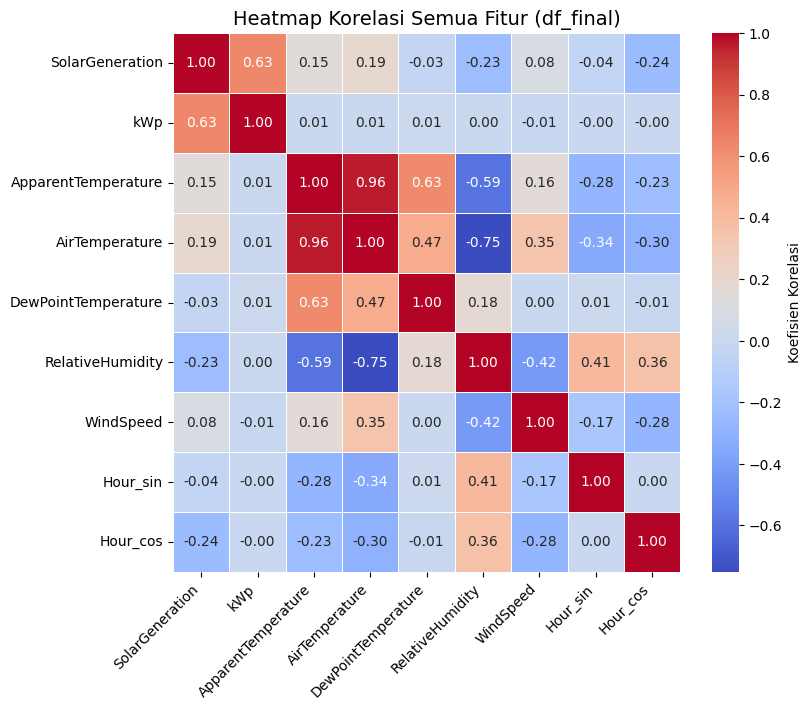

In [16]:
# Kolom yang akan divisualisasikan korelasinya
corr_cols = ['SolarGeneration', 'kWp', 'ApparentTemperature', 'AirTemperature', 
             'DewPointTemperature', 'RelativeHumidity', 'WindSpeed', 'Hour_sin', 'Hour_cos']
df_corr = df_final[corr_cols].copy() 

plt.figure(figsize=(18, 7))

# --- PLOT 1: Heatmap Korelasi Penuh ---
plt.subplot(1, 2, 1)
corr_matrix_full = df_corr.corr()
sns.heatmap(corr_matrix_full, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Koefisien Korelasi'})
plt.title('Heatmap Korelasi Semua Fitur (df_final)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

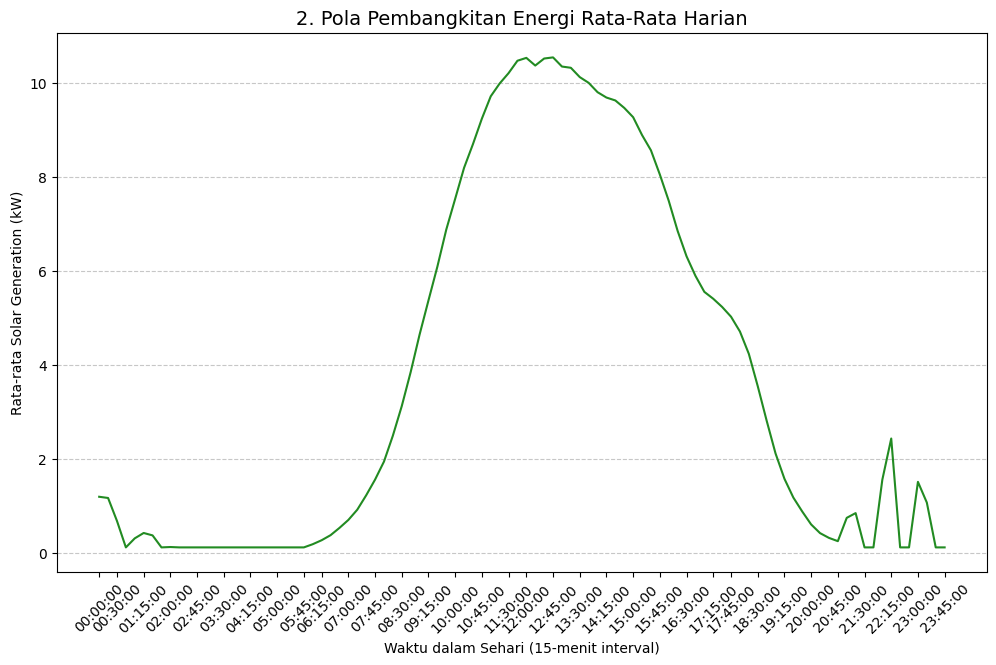

In [17]:
# --- PLOT 2: Pola Harian Rata-Rata --- 
# Pastikan kolom TimeOfDay tersedia (sudah dibuat di sel sebelumnya kalau diperlukan)
if 'TimeOfDay' not in df_final:
	df_final['TimeOfDay'] = df_final['Timestamp'].dt.time

# Hitung rata-rata SolarGeneration untuk setiap interval waktu
avg_daily_pattern = df_final.groupby('TimeOfDay')['SolarGeneration'].mean().reset_index()

# Buat kolom string untuk label sumbu-x (menghindari object dtype issues)
avg_daily_pattern['TimeOfDay_str'] = avg_daily_pattern['TimeOfDay'].astype(str)
# Atur ukuran figure yang lebih besar
plt.figure(figsize=(12, 7))
# Plot menggunakan index sebagai sumbu-x untuk menghindari passing object dtype ke matplotlib ticks
sns.lineplot(x=avg_daily_pattern.index, y='SolarGeneration', data=avg_daily_pattern, color='forestgreen')

# Tampilkan hanya label waktu kunci (menggunakan index sebagai posisi tick dan string sebagai label)
n_ticks = 34
tick_indices = np.linspace(0, len(avg_daily_pattern) - 1, n_ticks, dtype=int)
plt.xticks(tick_indices, avg_daily_pattern['TimeOfDay_str'].iloc[tick_indices], rotation=45)

plt.title('2. Pola Pembangkitan Energi Rata-Rata Harian', fontsize=14)
plt.xlabel('Waktu dalam Sehari (15-menit interval)')
plt.ylabel('Rata-rata Solar Generation (kW)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

*normalization*

In [18]:
# Definisikan kolom yang akan dinormalisasi (Fitur input non-siklus)
# SolarGeneration (Target) akan di-scale secara terpisah
numeric_cols = [
    'kWp', 'latitude', 'longitude', 
    'ApparentTemperature', 'AirTemperature', 'DewPointTemperature', 
    'RelativeHumidity', 'WindSpeed', 'WindDirection'
]

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()